In [1]:
!pip install --quiet pandas geopandas shapely

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [3]:
df = pd.read_csv('powerplants.csv')
df.head()

Plant_Code          Plant_Name        Utility_Na  Utility_ID  \
0           2        Bankhead Dam  Alabama Power Co         195   
1           3               Barry  Alabama Power Co         195   
2           4  Walter Bouldin Dam  Alabama Power Co         195   
3           7             Gadsden  Alabama Power Co         195   
4           8              Gorgas  Alabama Power Co         195   

         sector_nam       City      County StateName    Zip  \
0  Electric Utility  Northport  Tuscaloosa   Alabama  35476   
1  Electric Utility      Bucks      Mobile   Alabama  36512   
2  Electric Utility   Wetumpka      Elmore   Alabama  36092   
3  Electric Utility    Gadsden      Etowah   Alabama  35903   
4  Electric Utility    Parrish      Walker   Alabama  35580   

             Street_Add  ... Solar_MW  Wind_MW  Geo_MW  Other_MW  \
0    19001 Lock 17 Road  ...      0.0      0.0     NaN       0.0   
1      North Highway 43  ...      0.0      0.0     NaN       0.0   
2  750 Bouldin Dam Road  ...      0.0      0.0     NaN       0.0   
3     1000 Goodyear Ave  ...      0.0      0.0     NaN       0.0   
4       460 Gorgas Road  ...      0.0      0.0     NaN       0.0   

                                source_des  \
0                    Hydroelectric = 56 MW   
1  Coal = 1100.5 MW, Natural Gas = 1072 MW   
2                 Hydroelectric = 225.9 MW   
3                     Natural Gas = 130 MW   
4                         Coal = 1053.7 MW   

                                           tech_desc  \
0                         Conventional Hydroelectric   
1  Conventional Steam Coal; Natural Gas Fired Com...   
2                         Conventional Hydroelectric   
3                          Natural Gas Steam Turbine   
4                            Conventional Steam Coal   

                          Source  Period   Latitude  Longitude  
0  EIA-860, EIA-860M and EIA-923  201801  33.458665 -87.356823  
1  EIA-860, EIA-860M and EIA-923  201801  31.006900 -88.010300  
2  EIA-860, EIA-860M and EIA-923  201801  32.583889 -86.283056  
3  EIA-860, EIA-860M and EIA-923  201801  34.012800 -85.970800  
4  EIA-860, EIA-860M and EIA-923  201801  33.644344 -87.196486  

[5 rows x 30 columns]

In [4]:
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points.head()

0    POINT (-87.356823 33.458665)
1        POINT (-88.0103 31.0069)
2    POINT (-86.283056 32.583889)
3        POINT (-85.9708 34.0128)
4    POINT (-87.196486 33.644344)
dtype: object

In [5]:
powerplants = gpd.GeoDataFrame(df, geometry=points)

# Lets strip out Alaska, Hawaii and Puerto Rico so that we're left with only the 'lower 48' states.
excluded_states = ['Alaska', 'Hawaii', 'Puerto Rico']
powerplants_48 = powerplants[~powerplants['StateName'].isin(excluded_states)]

powerplants_48 = powerplants_48.set_crs('epsg:4326')

powerplants_48 = powerplants_48.to_crs('epsg:5070') # This is deprecated syntax apparently: powerplants.crs = {"init": "epsg:4326"}
powerplants_48.head()

Plant_Code          Plant_Name        Utility_Na  Utility_ID  \
0           2        Bankhead Dam  Alabama Power Co         195   
1           3               Barry  Alabama Power Co         195   
2           4  Walter Bouldin Dam  Alabama Power Co         195   
3           7             Gadsden  Alabama Power Co         195   
4           8              Gorgas  Alabama Power Co         195   

         sector_nam       City      County StateName    Zip  \
0  Electric Utility  Northport  Tuscaloosa   Alabama  35476   
1  Electric Utility      Bucks      Mobile   Alabama  36512   
2  Electric Utility   Wetumpka      Elmore   Alabama  36092   
3  Electric Utility    Gadsden      Etowah   Alabama  35903   
4  Electric Utility    Parrish      Walker   Alabama  35580   

             Street_Add  ... Wind_MW  Geo_MW  Other_MW  \
0    19001 Lock 17 Road  ...     0.0     NaN       0.0   
1      North Highway 43  ...     0.0     NaN       0.0   
2  750 Bouldin Dam Road  ...     0.0     NaN       0.0   
3     1000 Goodyear Ave  ...     0.0     NaN       0.0   
4       460 Gorgas Road  ...     0.0     NaN       0.0   

                                source_des  \
0                    Hydroelectric = 56 MW   
1  Coal = 1100.5 MW, Natural Gas = 1072 MW   
2                 Hydroelectric = 225.9 MW   
3                     Natural Gas = 130 MW   
4                         Coal = 1053.7 MW   

                                           tech_desc  \
0                         Conventional Hydroelectric   
1  Conventional Steam Coal; Natural Gas Fired Com...   
2                         Conventional Hydroelectric   
3                          Natural Gas Steam Turbine   
4                            Conventional Steam Coal   

                          Source  Period   Latitude  Longitude  \
0  EIA-860, EIA-860M and EIA-923  201801  33.458665 -87.356823   
1  EIA-860, EIA-860M and EIA-923  201801  31.006900 -88.010300   
2  EIA-860, EIA-860M and EIA-923  201801  32.583889 -86.283056   
3  EIA-860, EIA-860M and EIA-923  201801  34.012800 -85.970800   
4  EIA-860, EIA-860M and EIA-923  201801  33.644344 -87.196486   

                         geometry  
0   POINT (796926.834 1190764.26)  
1   POINT (759769.281 913190.532)  
2    POINT (905570.265 1103206.9)  
3  POINT (917759.265 1264879.229)  
4  POINT (809750.044 1212771.116)  

[5 rows x 31 columns]

In [6]:
# Loading in the USA shapefile

usa = gpd.read_file('cb_2016_us_state_20m/cb_2016_us_state_20m.shp')
usa.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS      NAME LSAD         ALAND  \
0      23  01779787  0400000US23    23     ME     Maine   00   79885221885   
1      15  01779782  0400000US15    15     HI    Hawaii   00   16634100855   
2      04  01779777  0400000US04    04     AZ   Arizona   00  294198560125   
3      05  00068085  0400000US05    05     AR  Arkansas   00  134771517596   
4      10  01779781  0400000US10    10     DE  Delaware   00    5047194742   

        AWATER                                           geometry  
0  11748755195  MULTIPOLYGON (((-68.92401 43.88541, -68.87478 ...  
1  11777698394  MULTIPOLYGON (((-156.04965 19.78045, -156.0062...  
2   1027346486  POLYGON ((-114.79968 32.59362, -114.80939 32.6...  
3   2960191698  POLYGON ((-94.61792 36.49941, -94.3612 36.4996...  
4   1398720828  POLYGON ((-75.77379 39.7222, -75.75323 39.7579...

[]

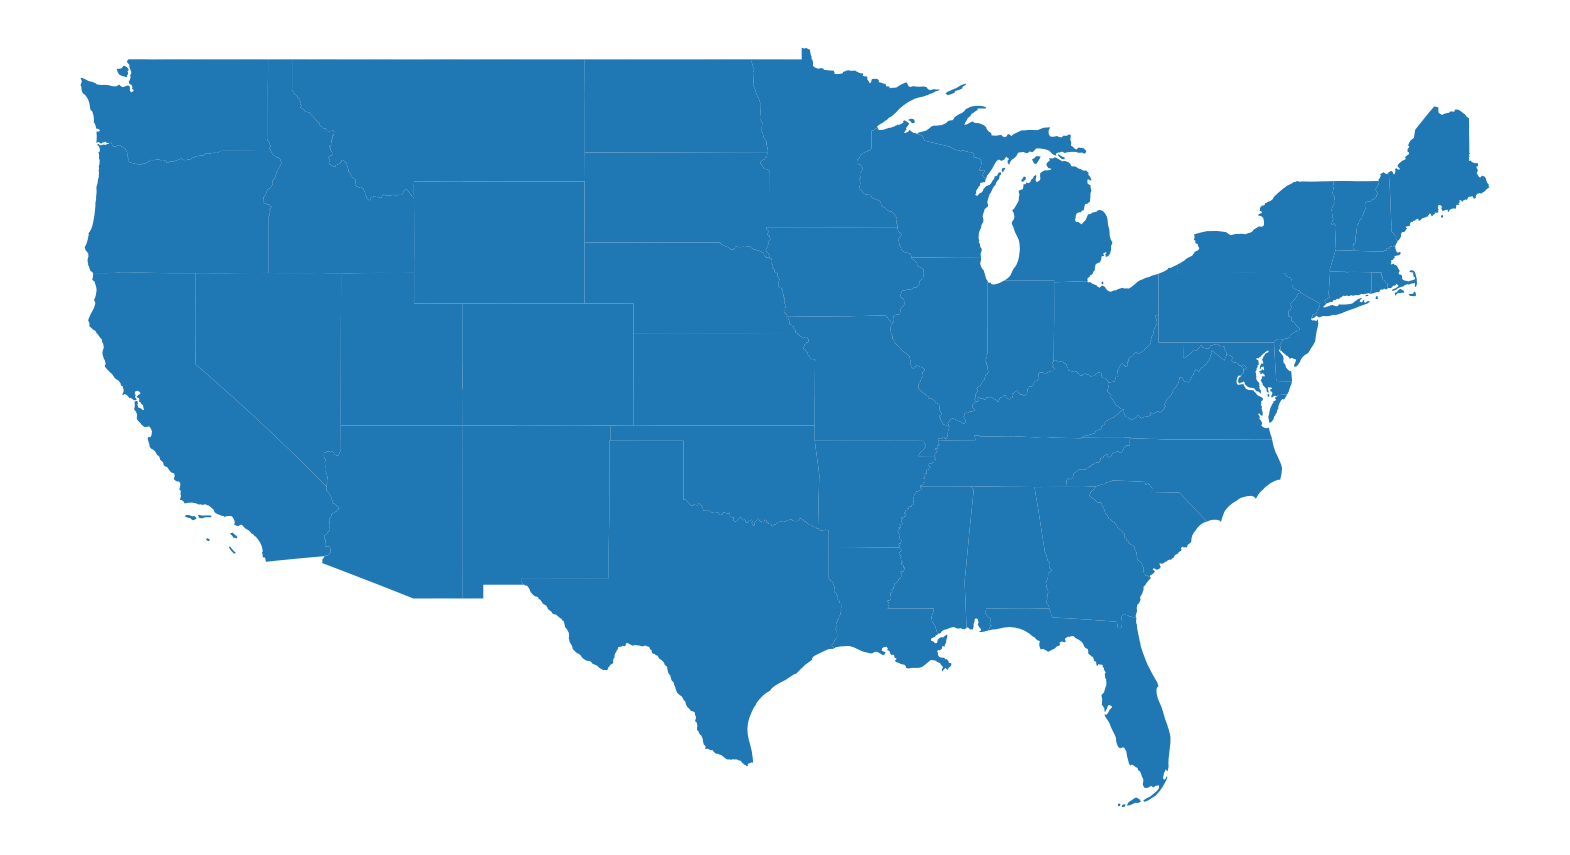

In [7]:
usa_lower_48 = usa[~usa['NAME'].isin(excluded_states)]
clean_usa = usa_lower_48.plot(figsize = (20,20))
clean_usa.axis('off')
clean_usa.plot()

[]

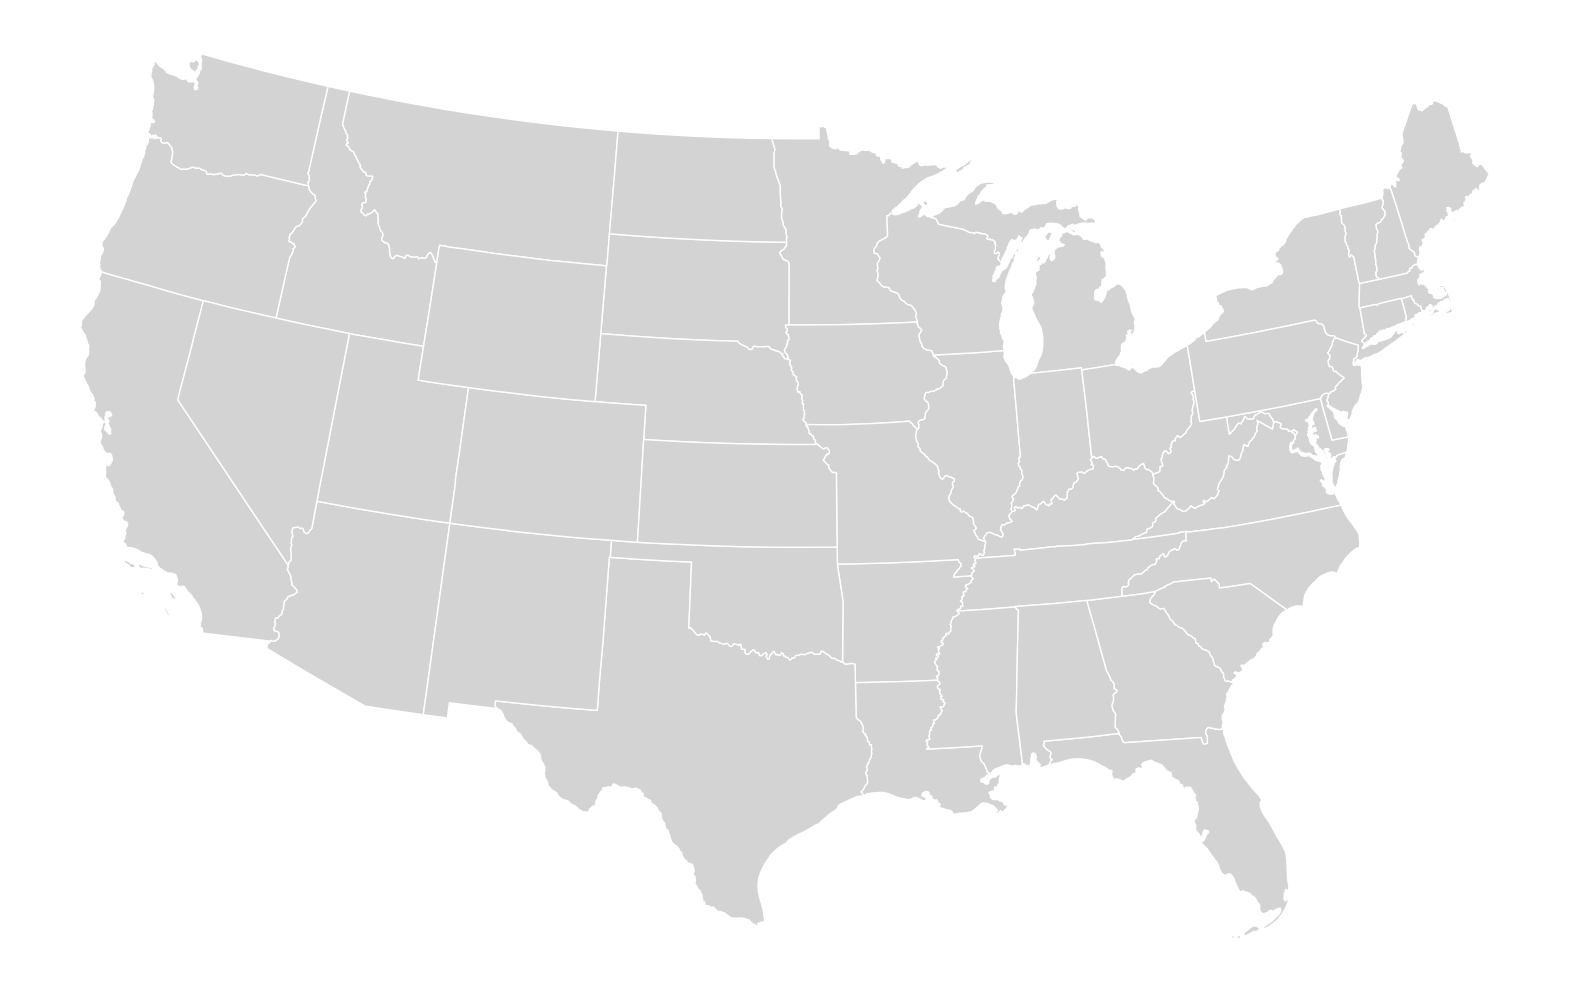

In [8]:
# change to Conus (Continental US) Albers projection
usa_lower_48 = usa_lower_48.to_crs(epsg=5070)
clean_usa = usa_lower_48.plot(figsize = (20,20), color='#D3D3D3', edgecolor='white')
clean_usa.axis('off')
clean_usa.plot()

Text(0.5, 1.0, 'Map 1: Dot map')

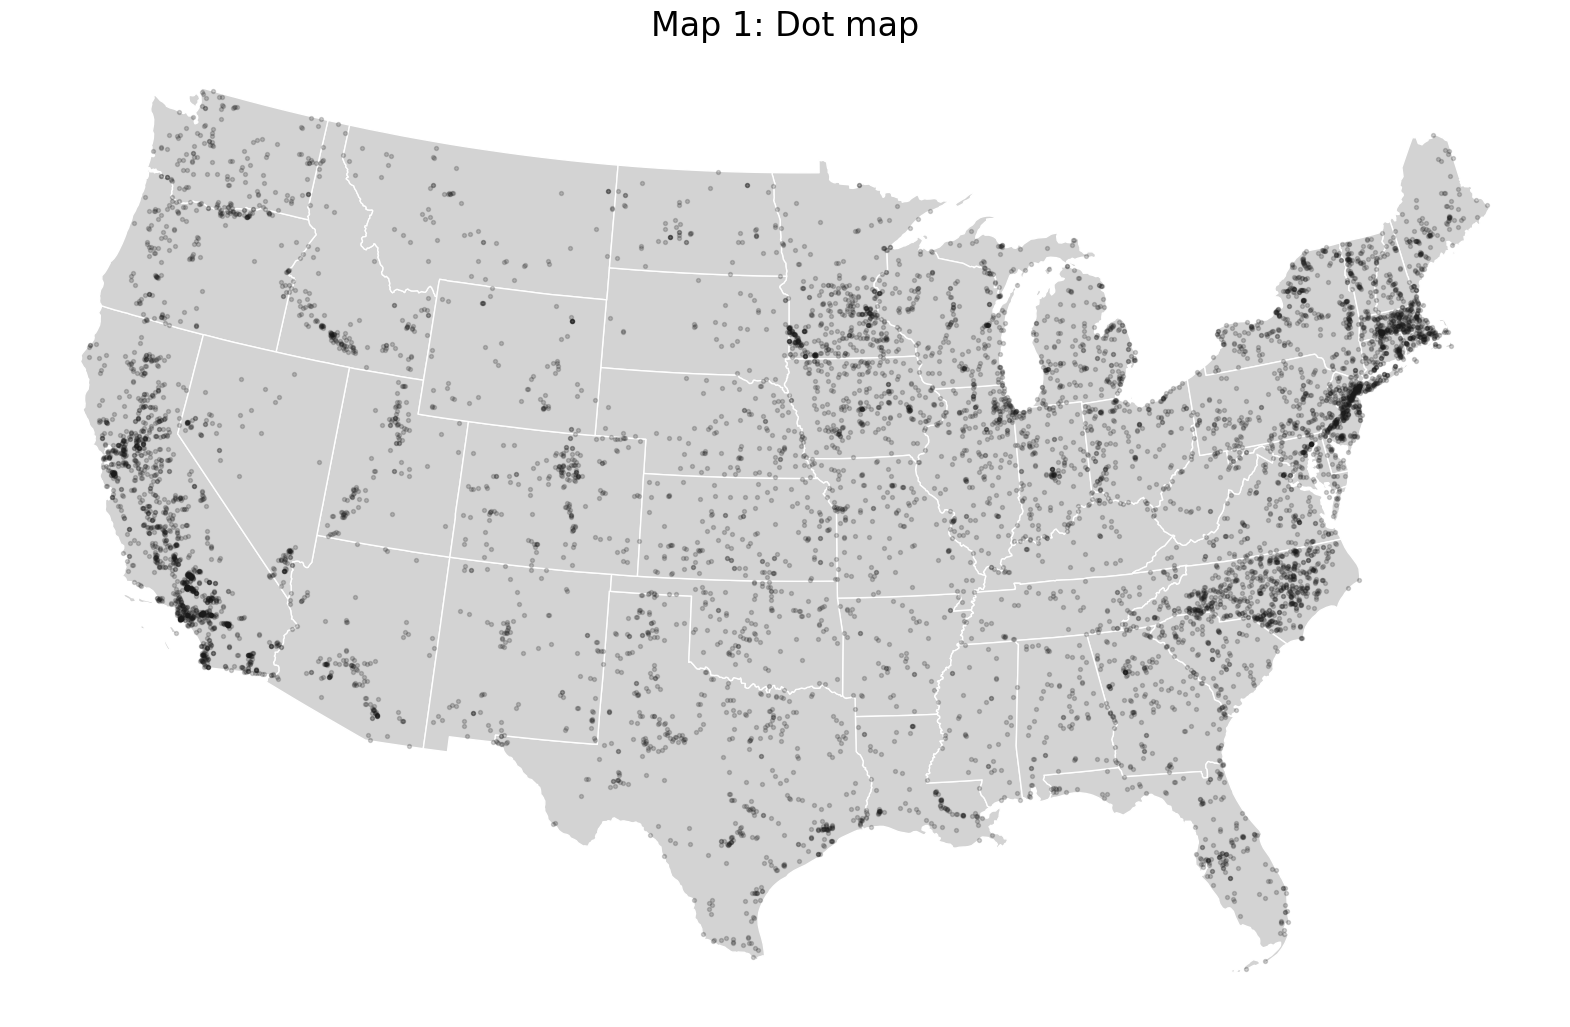

In [41]:
# Ensure CRS matches
usa_lower_48 = usa_lower_48.to_crs('epsg:5070')
powerplants_48 = powerplants_48.to_crs('epsg:5070')

# Plot the map and points
ax = usa_lower_48.plot(color='lightgrey', edgecolor='white', figsize=(20, 20));

# Plot the power plants with grey color and semi-transparency
powerplants_48.plot(ax=ax, color='#1A1A1A', markersize=8, alpha=0.2);

# Remove the axes
ax.axis('off');
ax.set_title('Map 1: Dot map', fontsize=24)

Text(0.5, 1.0, 'Map 2: Bubble map')

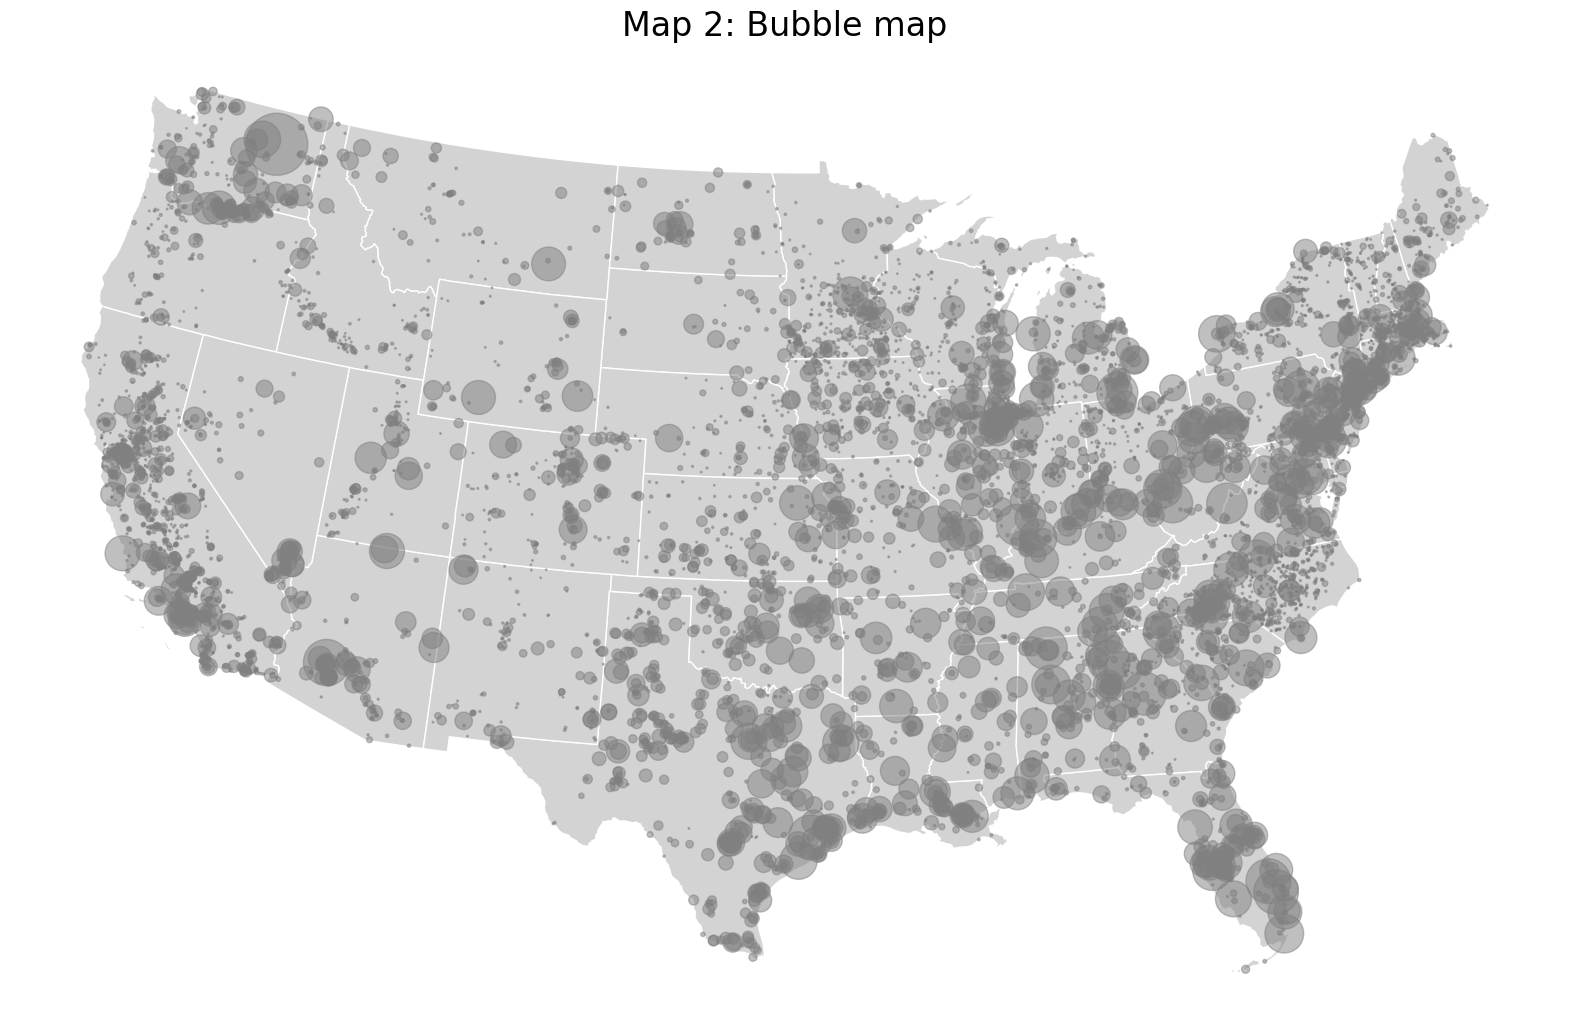

In [48]:
# Plotting Map 2, the Bubble Map
ax = usa_lower_48.plot(color='lightgrey', edgecolor='white', figsize=(20, 20));

# Normalize the 'Total_MW' column for proportional bubble sizes
min_size = 1     # Minimum bubble size (adjust as needed)
max_size = 2000   # Maximum bubble size (adjust as needed)

# Normalize the Total_MW values between min_size and max_size
powerplants_48['bubble_size'] = (
    (powerplants_48['Total_MW'] - powerplants_48['Total_MW'].min()) /
    (powerplants_48['Total_MW'].max() - powerplants_48['Total_MW'].min())
) * (max_size - min_size) + min_size

# Plot the bubble map, scaling by TOTAL_MW
powerplants_48.plot(
    ax=ax,
    color='grey',                      # Set bubble color
    alpha=0.5,                         # Semi-transparency for overlapping bubbles
    markersize=powerplants_48['bubble_size'],  # Normalize bubble sizes
);

# Remove axes and add title
ax.axis('off');
ax.set_title('Map 2: Bubble map', fontsize=24)

Text(0.5, 1.0, 'Map 3: Colored dot map')

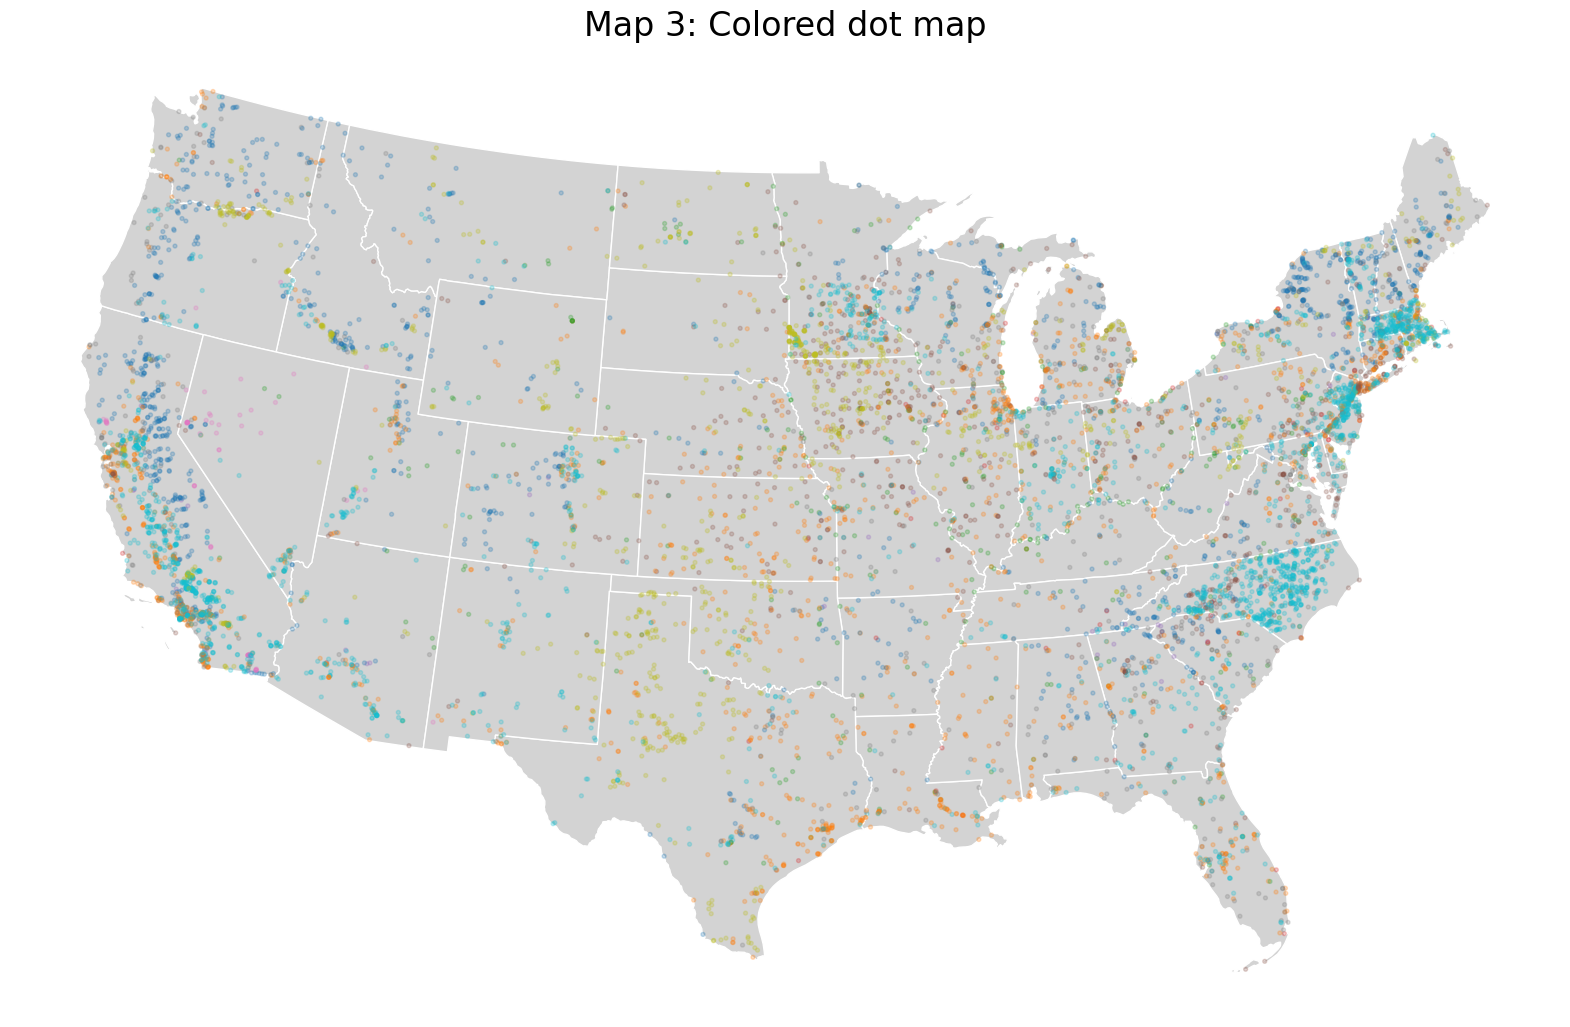

In [40]:
# Map 3: Colored dot map

import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.colors as mcolors

# Get the unique power types from the 'PrimSource' column
unique_sources = powerplants_48['PrimSource'].unique()

# Generate a colormap with distinct colors
colormap = colormaps.get_cmap('tab10')  # Use 'tab10' for up to 10 distinct colors
colors = [mcolors.to_hex(colormap(i / len(unique_sources))) for i in range(len(unique_sources))]

# Add a color column to the GeoDataFrame
powerplants_48['color'] = powerplants_48['PrimSource'].map(color_dict)

# Plot the map with colors based on 'PrimSource'
ax = usa_lower_48.plot(color='lightgrey', edgecolor='white', figsize=(20, 20))

powerplants_48.plot(
    ax=ax,
    color=powerplants_48['color'],  # Use the generated color mapping
    markersize=8,                  # Fixed size for all points
    alpha=0.25                       # Optional transparency
)

ax.axis('off')
ax.set_title('Map 3: Colored dot map', fontsize=24)

Text(0.5, 1.0, 'Map 4: Colored bubble map')

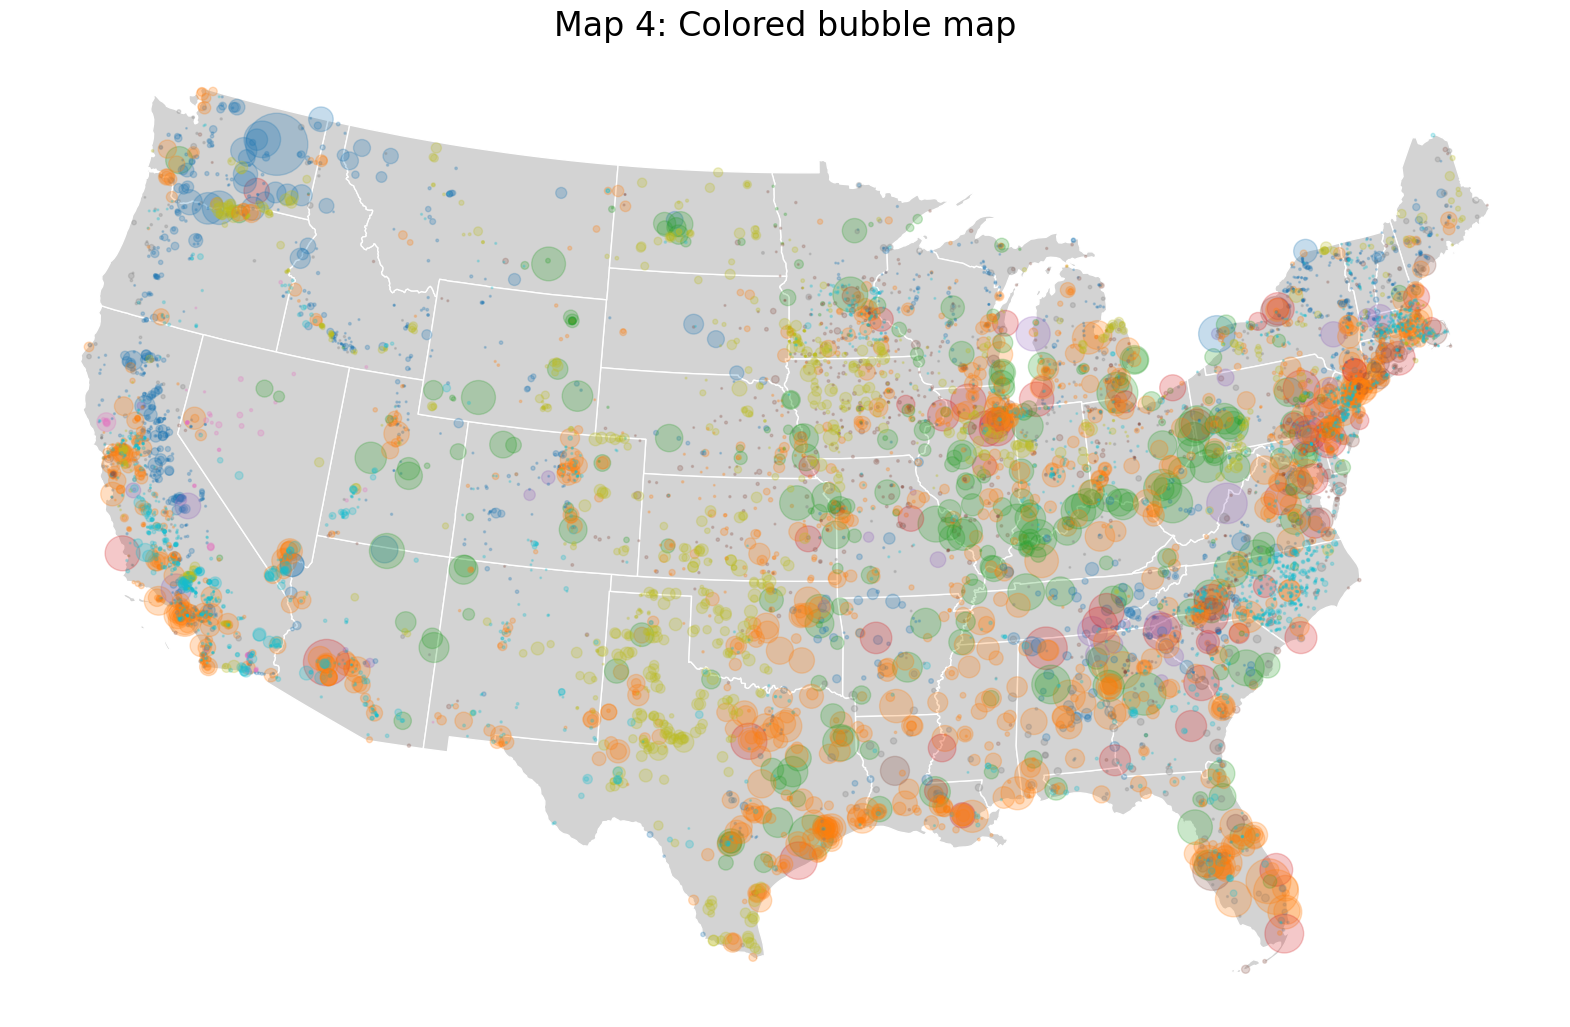

In [50]:
# Map 4: Colored bubble map

ax = usa_lower_48.plot(color='lightgrey', edgecolor='white', figsize=(20, 20))

powerplants_48.plot(
    ax=ax,
    color=powerplants_48['color'],  
    markersize=powerplants_48['bubble_size'],  # Back to hierarchy of sizes
    alpha=0.25
)

ax.axis('off')
ax.set_title('Map 4: Colored bubble map', fontsize=24)

Text(0.5, 1.0, 'Map 5: Coal only')

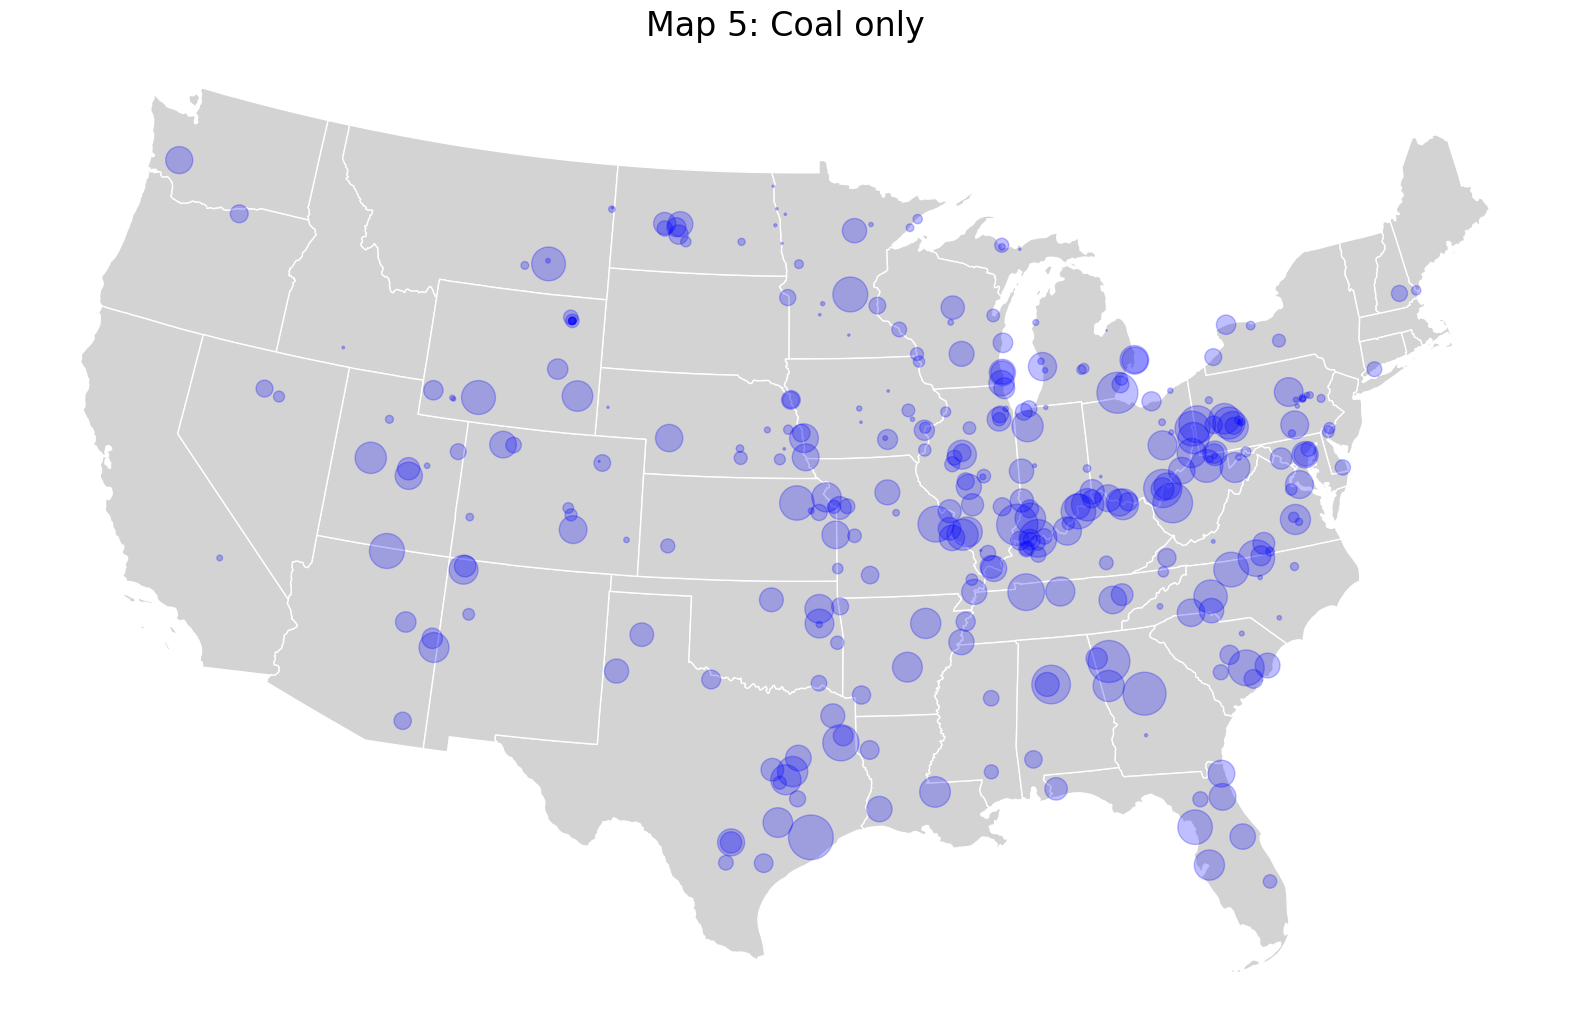

In [53]:
# Map 5: Coal only
# Filter for just coal.

coal_plants = powerplants_48[powerplants_48['PrimSource'] == 'coal']

ax = usa_lower_48.plot(color='lightgrey', edgecolor='white', figsize=(20, 20))

coal_plants.plot(
    ax=ax,
    color='blue',  
    markersize=coal_plants['bubble_size'],  # Back to hierarchy of sizes
    alpha=0.25
)

ax.axis('off')
ax.set_title('Map 5: Coal only', fontsize=24)

Text(0.5, 1.0, 'Map 6: Solar only')

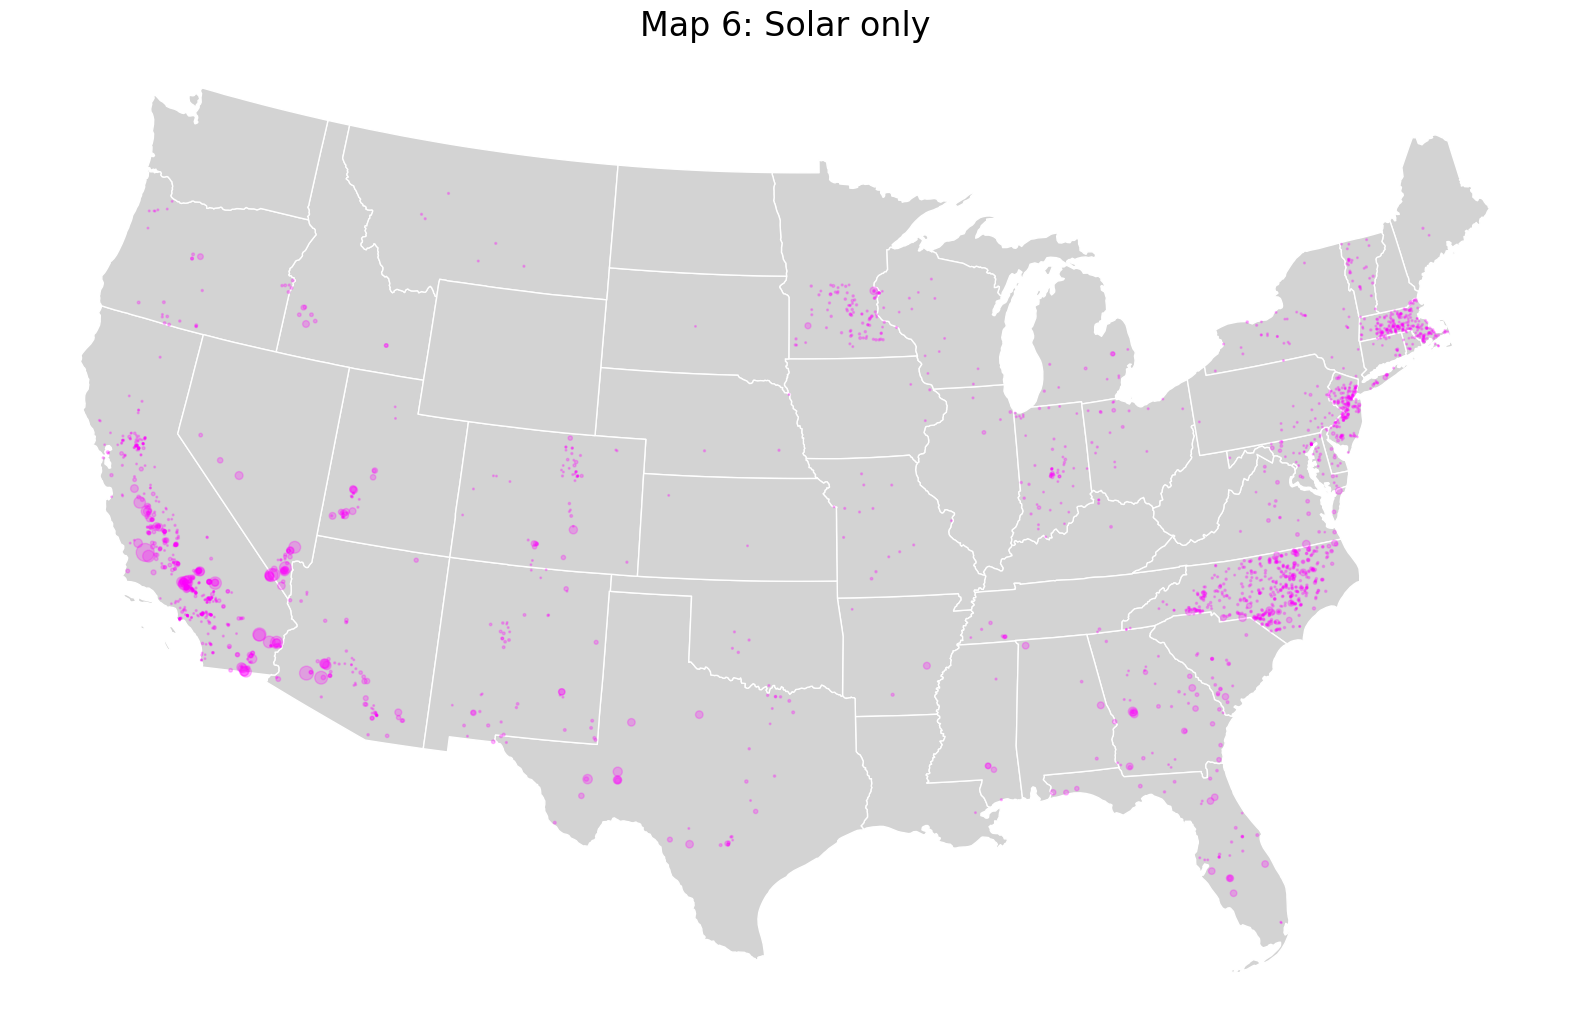

In [56]:
# Map 6: Solar only
# Filter for just coal.

coal_plants = powerplants_48[powerplants_48['PrimSource'] == 'solar']

ax = usa_lower_48.plot(color='lightgrey', edgecolor='white', figsize=(20, 20))

coal_plants.plot(
    ax=ax,
    color='magenta',  
    markersize=coal_plants['bubble_size'],  # Back to hierarchy of sizes
    alpha=0.25
)

ax.axis('off')
ax.set_title('Map 6: Solar only', fontsize=24)

Text(0.5, 1.0, 'Map 7: Solar choropleth')

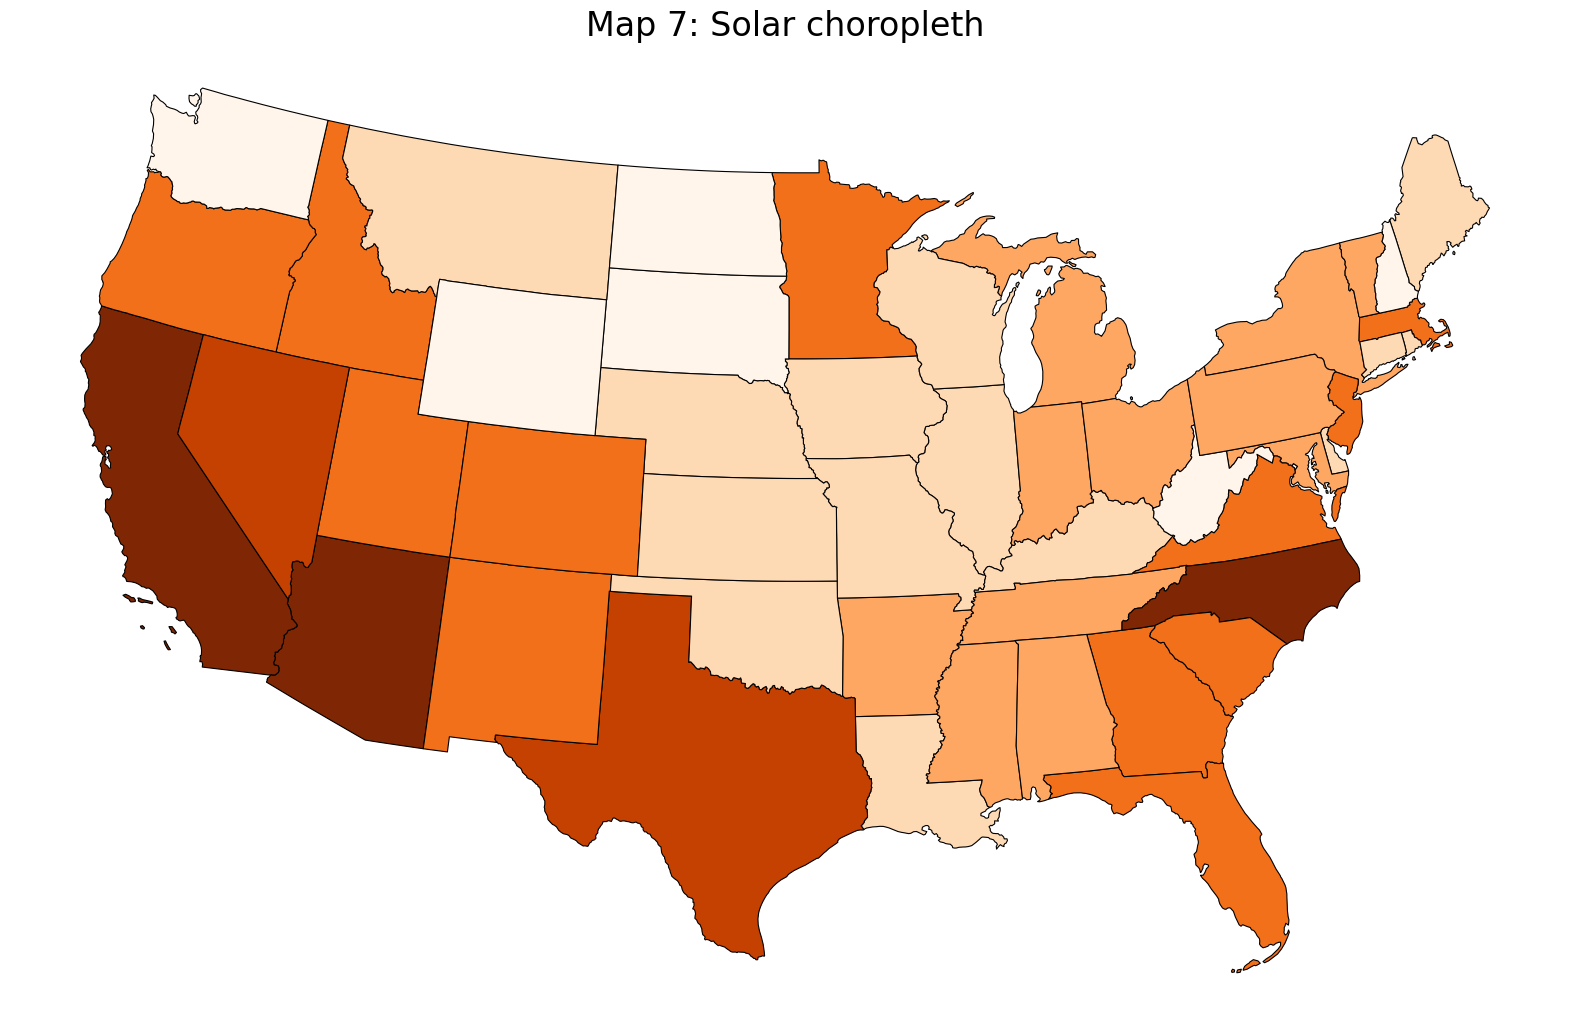

In [82]:
# Map 7: Solar choropleth

# Get all the solar plants
solar_plants = powerplants_48[powerplants_48['PrimSource'] == 'solar']

# Apply logarithmic scaling to normalize
solar_by_state = solar_plants.groupby('StateName')['Total_MW'].sum().reset_index()

# Merge solar data with state boundaries
usa_solar = usa_lower_48.merge(solar_by_state, left_on='NAME', right_on='StateName', how='left')
usa_solar['Total_MW'] = usa_solar['Total_MW'].fillna(0)


usa_solar['Log_Scaled_MW'] = np.log1p(usa_solar['Total_MW'])  # log(x + 1)

usa_solar['Capacity_Range'] = pd.qcut(usa_solar['Log_Scaled_MW'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

# Add a new column with binned categories
usa_solar['Capacity_Range'] = pd.cut(usa_solar['Total_MW'], bins=bin_edges, labels=bin_labels, include_lowest=True)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plot the choropleth map
usa_solar.plot(
    column='Capacity_Range',         # Column to determine color
    cmap='Oranges',            # Gradient of orange
    linewidth=0.8,             # State boundary lines
    edgecolor='black',         # State boundary color
    ax=ax
)

ax.axis('off')
ax.set_title('Map 7: Solar choropleth', fontsize=24)

Text(0.5, 1.0, 'Map 8: Coal choropleth')

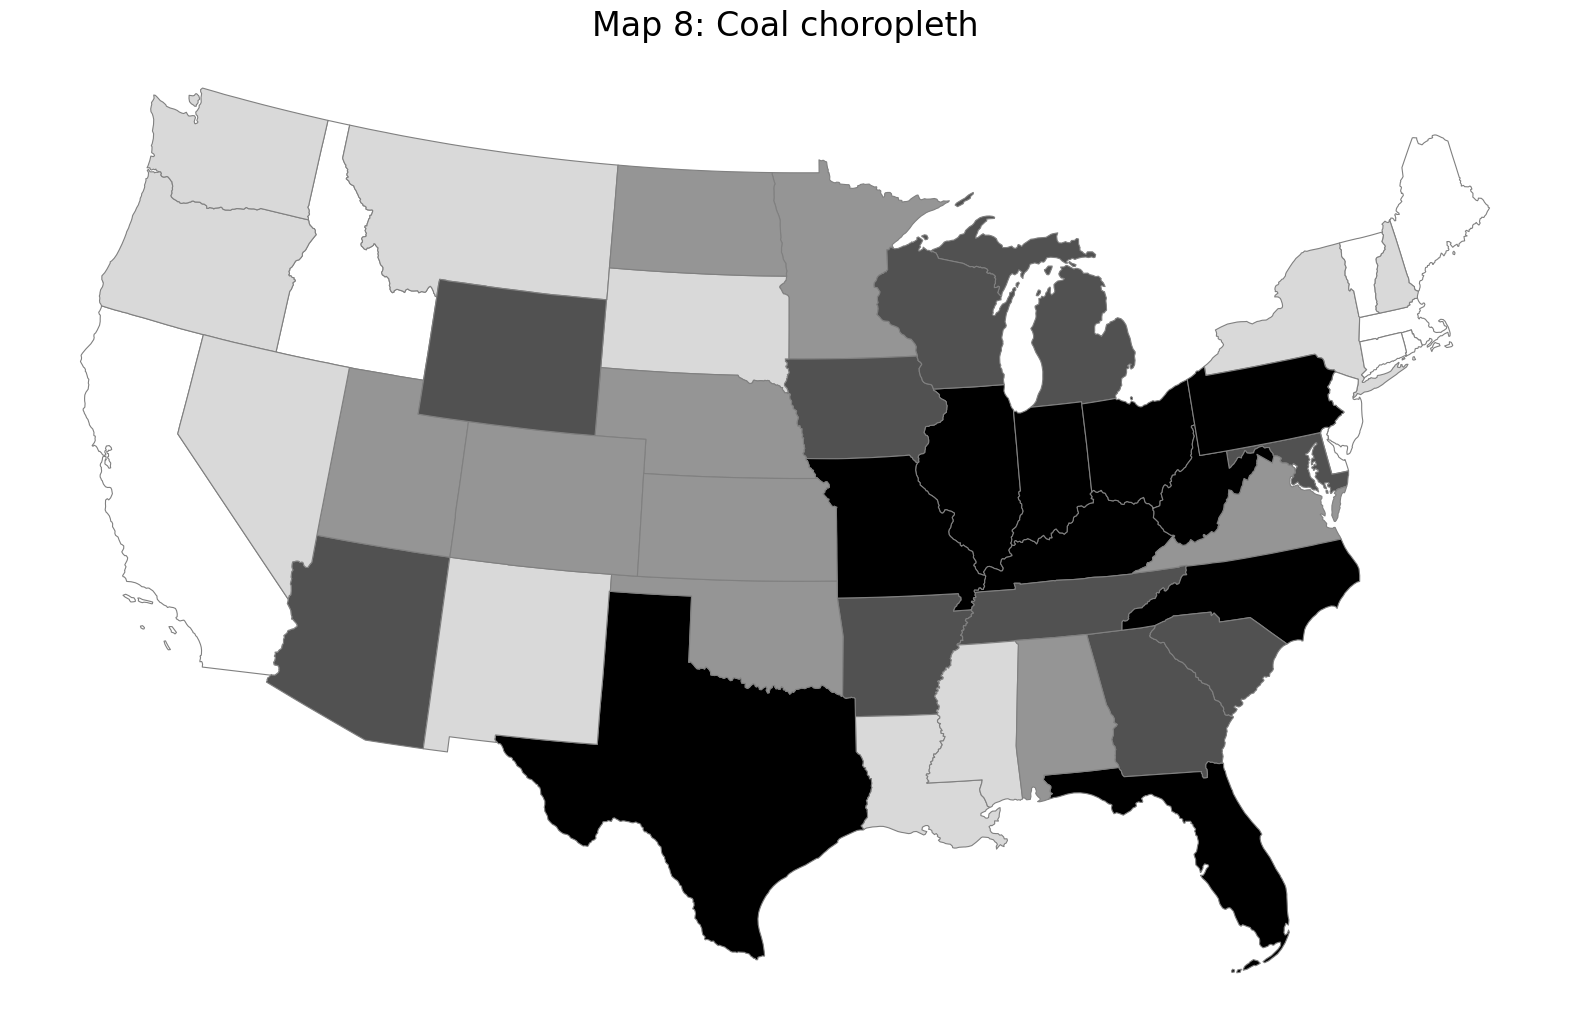

In [85]:
# Map 8: Coal choropleth

# Get all the coal plants
coal_plants = powerplants_48[powerplants_48['PrimSource'] == 'coal']

coal_by_state = coal_plants.groupby('StateName')['Total_MW'].sum().reset_index()

# Merge solar data with state boundaries
usa_coal = usa_lower_48.merge(coal_by_state, left_on='NAME', right_on='StateName', how='left')
usa_coal['Total_MW'] = usa_coal['Total_MW'].fillna(0)

usa_coal['Log_Scaled_MW'] = np.log1p(usa_coal['Total_MW'])  # log(x + 1)

usa_coal['Capacity_Range'] = pd.qcut(usa_coal['Log_Scaled_MW'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plot the choropleth map
usa_coal.plot(
    column='Capacity_Range',         # Column to determine color
    cmap='Greys',            # Gradient of black and white
    linewidth=0.8,             # State boundary lines
    edgecolor='grey',         # State boundary color
    ax=ax
)

ax.axis('off')
ax.set_title('Map 8: Coal choropleth', fontsize=24)

Text(0.5, 1.0, 'Map 9: Power output by state')

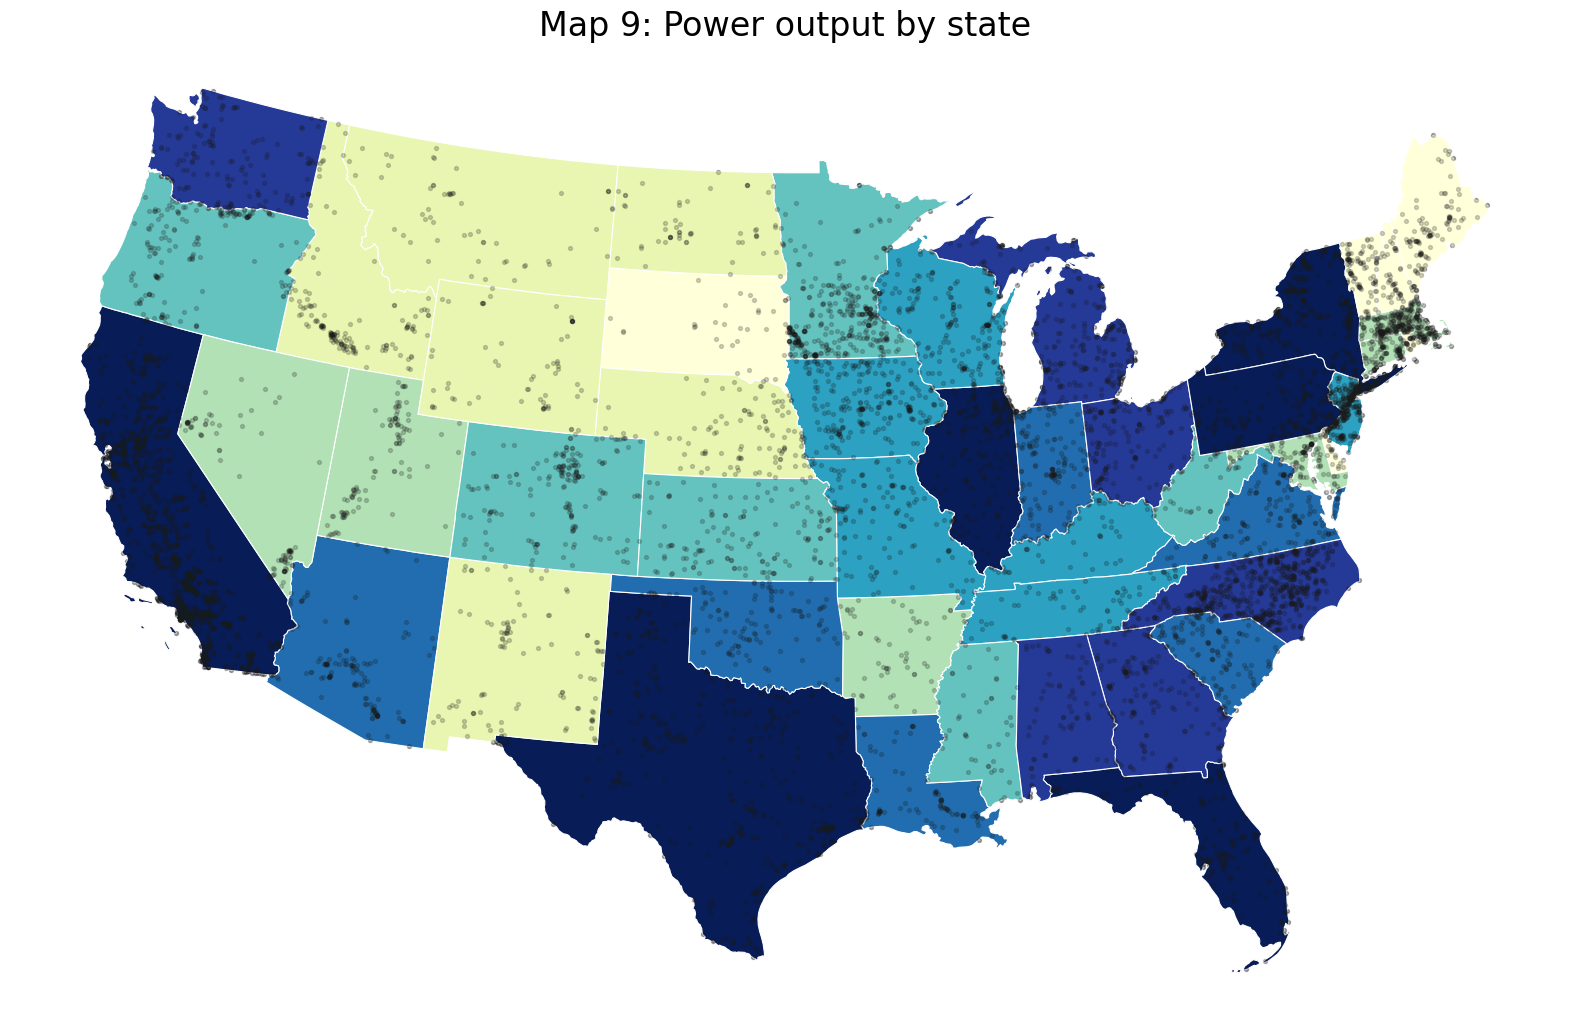

In [93]:
# Map 9: Power output by state

# Grabbing the grey dots from our first map:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

powerplants_48.plot(ax=ax, color='#1A1A1A', markersize=8, alpha=0.2, label='Power Plants')

# Get the total power for each state
total_MW_by_state = powerplants_48.groupby('StateName')['Total_MW'].sum().reset_index()

# Merge total MW data with state boundaries
usa_power = usa_lower_48.merge(total_MW_by_state, left_on='NAME', right_on='StateName', how='left')

usa_power['Log_Scaled_MW'] = np.log1p(usa_power['Total_MW'])  # log(x + 1)

usa_power['Capacity_Range'] = pd.qcut(usa_power['Log_Scaled_MW'], q=8, labels=[
    'Very Low', 'Low', 'Moderately Low', 'Medium Low',
    'Medium', 'Moderately High', 'High', 'Very High'
])

# Plot the choropleth map
usa_power.plot(
    column='Capacity_Range',         # Column to determine color
    cmap='YlGnBu',            # Gradient of black and white
    linewidth=0.8,             # State boundary lines
    edgecolor='white',         # State boundary color
    ax=ax
)

powerplants_48.plot(
    ax=ax, 
    color='#1A1A1A', 
    markersize=8, 
    alpha=0.2
)

ax.axis('off')
ax.set_title('Map 9: Power output by state', fontsize=24)